In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

## Take A Over View of the Data

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


### We can see there is NO Null values

### Check for otherthings like duplication, null values, white spaces

In [9]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [10]:
df.duplicated(
)

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [11]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#### We Can see There is no null & No Duplicated values in the data set,
#### The Date are in Object data type, so Whe Should Change those in Date time format
#### There are some irrevan collumns for initial Data process like--> 1) URL, 2)Over View, 3) Language. so we can remove those for now

In [13]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [14]:
df['Release_Date'] = df['Release_Date'].dt.year
print(df['Release_Date'].dtypes)

int32


#### WE Can Do ,,, Directly in ONE LINE

In [16]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']).dt.year


### we can see there are some Un neseary cloms, -->
* OverVIew
* Orignal Language
* URL
##### there are not neede so we can Remove them

In [18]:
col = ['Overview', 'Poster_Url', 'Original_Language']
df.drop(col, axis = 1, inplace = True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,1970,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,1970,No Exit,2618.087,122,6.3,Thriller
3,1970,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,1970,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1970,Badlands,13.357,896,7.6,"Drama, Crime"
9823,1970,Violent Delights,13.356,8,3.5,Horror
9824,1970,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,1970,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


In [19]:
def catagorise(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [20]:
labels = ['Not Famous', 'Below Avg', 'Average', 'Popular']

catagorise(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,1970,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,1970,No Exit,2618.087,122,Below Avg,Thriller
3,1970,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,1970,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1970,Badlands,13.357,896,Popular,"Drama, Crime"
9823,1970,Violent Delights,13.356,8,Not Famous,Horror
9824,1970,The Offering,13.355,94,Not Famous,"Mystery, Thriller, Horror"
9825,1970,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History"


In [21]:
df.isna().sum()


Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [22]:
df.dropna(inplace= True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [23]:
# DO NOT RUN THIS AFTER THE PREVOUS,,


'''def catagorise(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop', include_lowest= True) 
    """This will 
    Include the((LOWEST), higest]
    so the NULL will NOT Appeare here for this DATASET after labling the Vote Average"""
    return df'''

'def catagorise(df, col, labels):\n    edges = [df[col].describe()[\'min\'],\n            df[col].describe()[\'25%\'],\n            df[col].describe()[\'50%\'],\n            df[col].describe()[\'75%\'],\n            df[col].describe()[\'max\']]\n    df[col] = pd.cut(df[col], edges, labels = labels, duplicates=\'drop\', include_lowest= True) \n    """This will \n    Include the((LOWEST), higest]\n    so the NULL will NOT Appeare here for this DATASET after labling the Vote Average"""\n    return df'

In [46]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,1970,The Batman,3827.658,1151,Popular,Crime
4,1970,The Batman,3827.658,1151,Popular,Mystery


In [50]:
df['Genre'] = df['Genre'].astype('category')

In [56]:
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [60]:
df.nunique()

Release_Date       1
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [62]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,1970,The Batman,3827.658,1151,Popular,Crime
4,1970,The Batman,3827.658,1151,Popular,Mystery


### 1) What is the most frequent genre of movies released on Netflix?

In [66]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [100]:
sns.set_style("whitegrid")

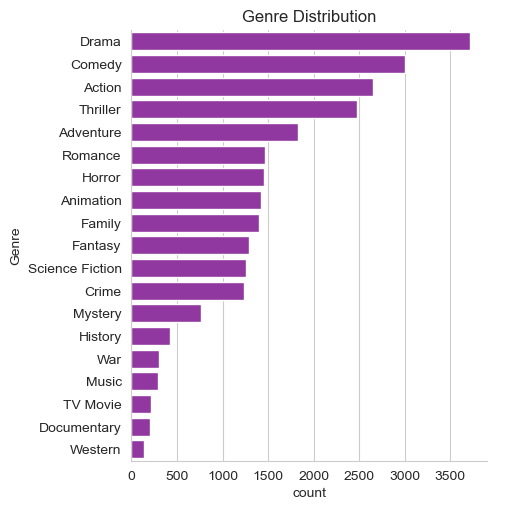

In [104]:

sns.catplot(y='Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().sort_values(ascending= False).index, color="#9C27B0")
plt.title('Genre Distribution')
plt.show()